# **Load an original dataset**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

This dataset is publically available on Kaggle.

In [1]:
# Load the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Upload the dataset to the enviroment 
df = pd.read_csv("/content/drive/MyDrive/Datasets/iris.data.csv")
df.head() # visualize the first five rows

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
# See the number of rows and columns in the dataset
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 149 rows and 5 columns.


In this dataset, we have 4 features and 1 categorical output

In [6]:
df.isnull().sum() # check any missing values 

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [7]:
# Label Encode the dataset
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
df["Iris-setosa"] = lable_encoder.fit_transform(df["Iris-setosa"])
df.head() #Visulaize

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


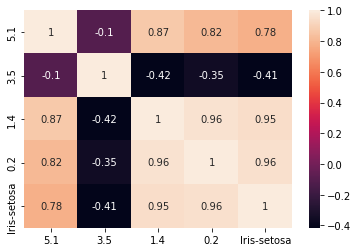

In [8]:
# Plot the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# **Classifiaction**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
import math

In [11]:
# Divide the data into "attributes" and "labels"
X = df.iloc[:,:-1] # the features in our dataset
y = df.iloc[:,-1] # what type of flower it is

In [12]:
# Split dataset in a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [13]:
# Train the model: classification (logistic loss) with a small ridge penalty
logModel = LogisticRegression(pe)

In [22]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000]
    }
]


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [24]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [31]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.975000 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.966667 (0.059317) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.966667 (0.059317) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.975000 (0.053359) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.972222 (0.058267) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972222 (0.058267) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961111 (0.063586) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.961111 (0.055833) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961111 (0.055833) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.949747 (0.063247) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.944444 (0.069166) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.944444 (0.069166) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.826515 (0.067515) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.846465 (0.064755) wit

In [32]:
grid_search.score(X_test,y_test)

0.9

In [33]:
predicted = grid_result.fit(X_train, y_train).predict(X_test)

In [34]:
predicted

array([1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2])